## Final Project Part 2

###  Group 9 Team Members: 
1. Ayesha Tajammul Ahmed Mulla (amulla@iu.edu)
2. Aazin Asif Shaikh (aazshaik@iu.edu)
3. Priya Kumari (kumarip@iu.edu)

#### Team Lead (who will be submitting):
Priya Kumari (kumarip@iu.edu)

### Daily Website Traffic Trends: A Time Series Analysis

In [173]:
# libraries 
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
from pmdarima.arima import auto_arima
import pmdarima
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

In [174]:
#load the dataset
data_website = pd.read_csv('daily-website-visitors.csv',header=0,parse_dates=True, 
                           squeeze=True)
data_website.head(10)

<ipython-input-174-fca4028a96da>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data_website = pd.read_csv('daily-website-visitors.csv',header=0,parse_dates=True,


,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
5,6,Friday,6,9/19/2014,"2,815","1,863","1,622",241
6,7,Saturday,7,9/20/2014,"1,658","1,118",985,133
7,8,Sunday,1,9/21/2014,"2,288","1,656","1,481",175
8,9,Monday,2,9/22/2014,"3,638","2,586","2,312",274
9,10,Tuesday,3,9/23/2014,"4,462","3,257","2,989",268


### Dataset Description 

#### Day                    - Day of week in text format (Sunday, etc.)


#### Day.Of.Week	 - Day of week in numeric format (1-7)


#### Date                   - Date in mm/dd/yyyy format


#### Page.Loads	      -  Number of pages loaded on a daily basis


#### Unique.Visits     - Daily number of visitors from whose IP addresses there haven't been hits on any page in over 6 hours


#### First.Time.Visits - Number of unique visitors who do not have a cookie identifying them as a previous customer


#### Returning.Visits  - Number of unique visitors minus first time visitors

### Data preprocessing 

In the code chunk below we perform data pre-processing by implementing the following operations:
1. Converting the 'Date' column to datetime format and assigning that column as the index for further time series analysis


2. The quantitative columns in our dataset ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits'] contain commas which we intend to remove. 

In [175]:
#convert date in datetime format and setting the index as Date
data_website.index=pd.to_datetime(data_website['Date'])

# Function to remove commas
def remove_commas(x):
    return float(x.replace(',', ''))

data_website['Page.Loads'] = data_website['Page.Loads'].apply(
    lambda x : remove_commas(x))
data_website['Unique.Visits'] = data_website['Unique.Visits'].apply(
    lambda x : remove_commas(x))
data_website['First.Time.Visits'] = data_website['First.Time.Visits'].apply(
    lambda x : remove_commas(x))
data_website['Returning.Visits'] = data_website['Returning.Visits'].apply(
    lambda x : remove_commas(x))

In [176]:
data_website.describe()

,Row,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,1084.000000,3.997231,4116.989386,2943.646516,2431.824181,511.822335
std,625.703338,2.000229,1350.977843,977.886472,828.704688,168.736370
min,1.000000,1.000000,1002.000000,667.000000,522.000000,133.000000
25%,542.500000,2.000000,3114.500000,2226.000000,1830.000000,388.500000
50%,1084.000000,4.000000,4106.000000,2914.000000,2400.000000,509.000000
75%,1625.500000,6.000000,5020.500000,3667.500000,3038.000000,626.500000
max,2167.000000,7.000000,7984.000000,5541.000000,4616.000000,1036.000000


## Time Series Visualization

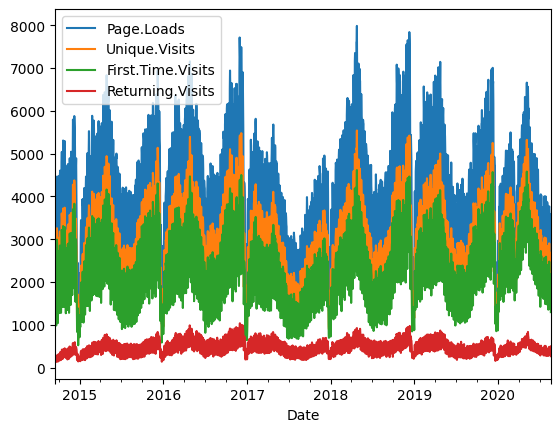

In [177]:
data_website.iloc[:,3:].plot()
plt.show()

Above plot is a combined plot of variables of interest which are Page.Loads, Unique.Visits, First.Time.Visits, Returning.Visits showing the distribution of data over the years 2014 to 2020.

We can observe that a similar and repeated pattern is followed by all the 4 columns which is a spike in the beginning of the year followed by a dip and again a rise is observed at the end of the year. 

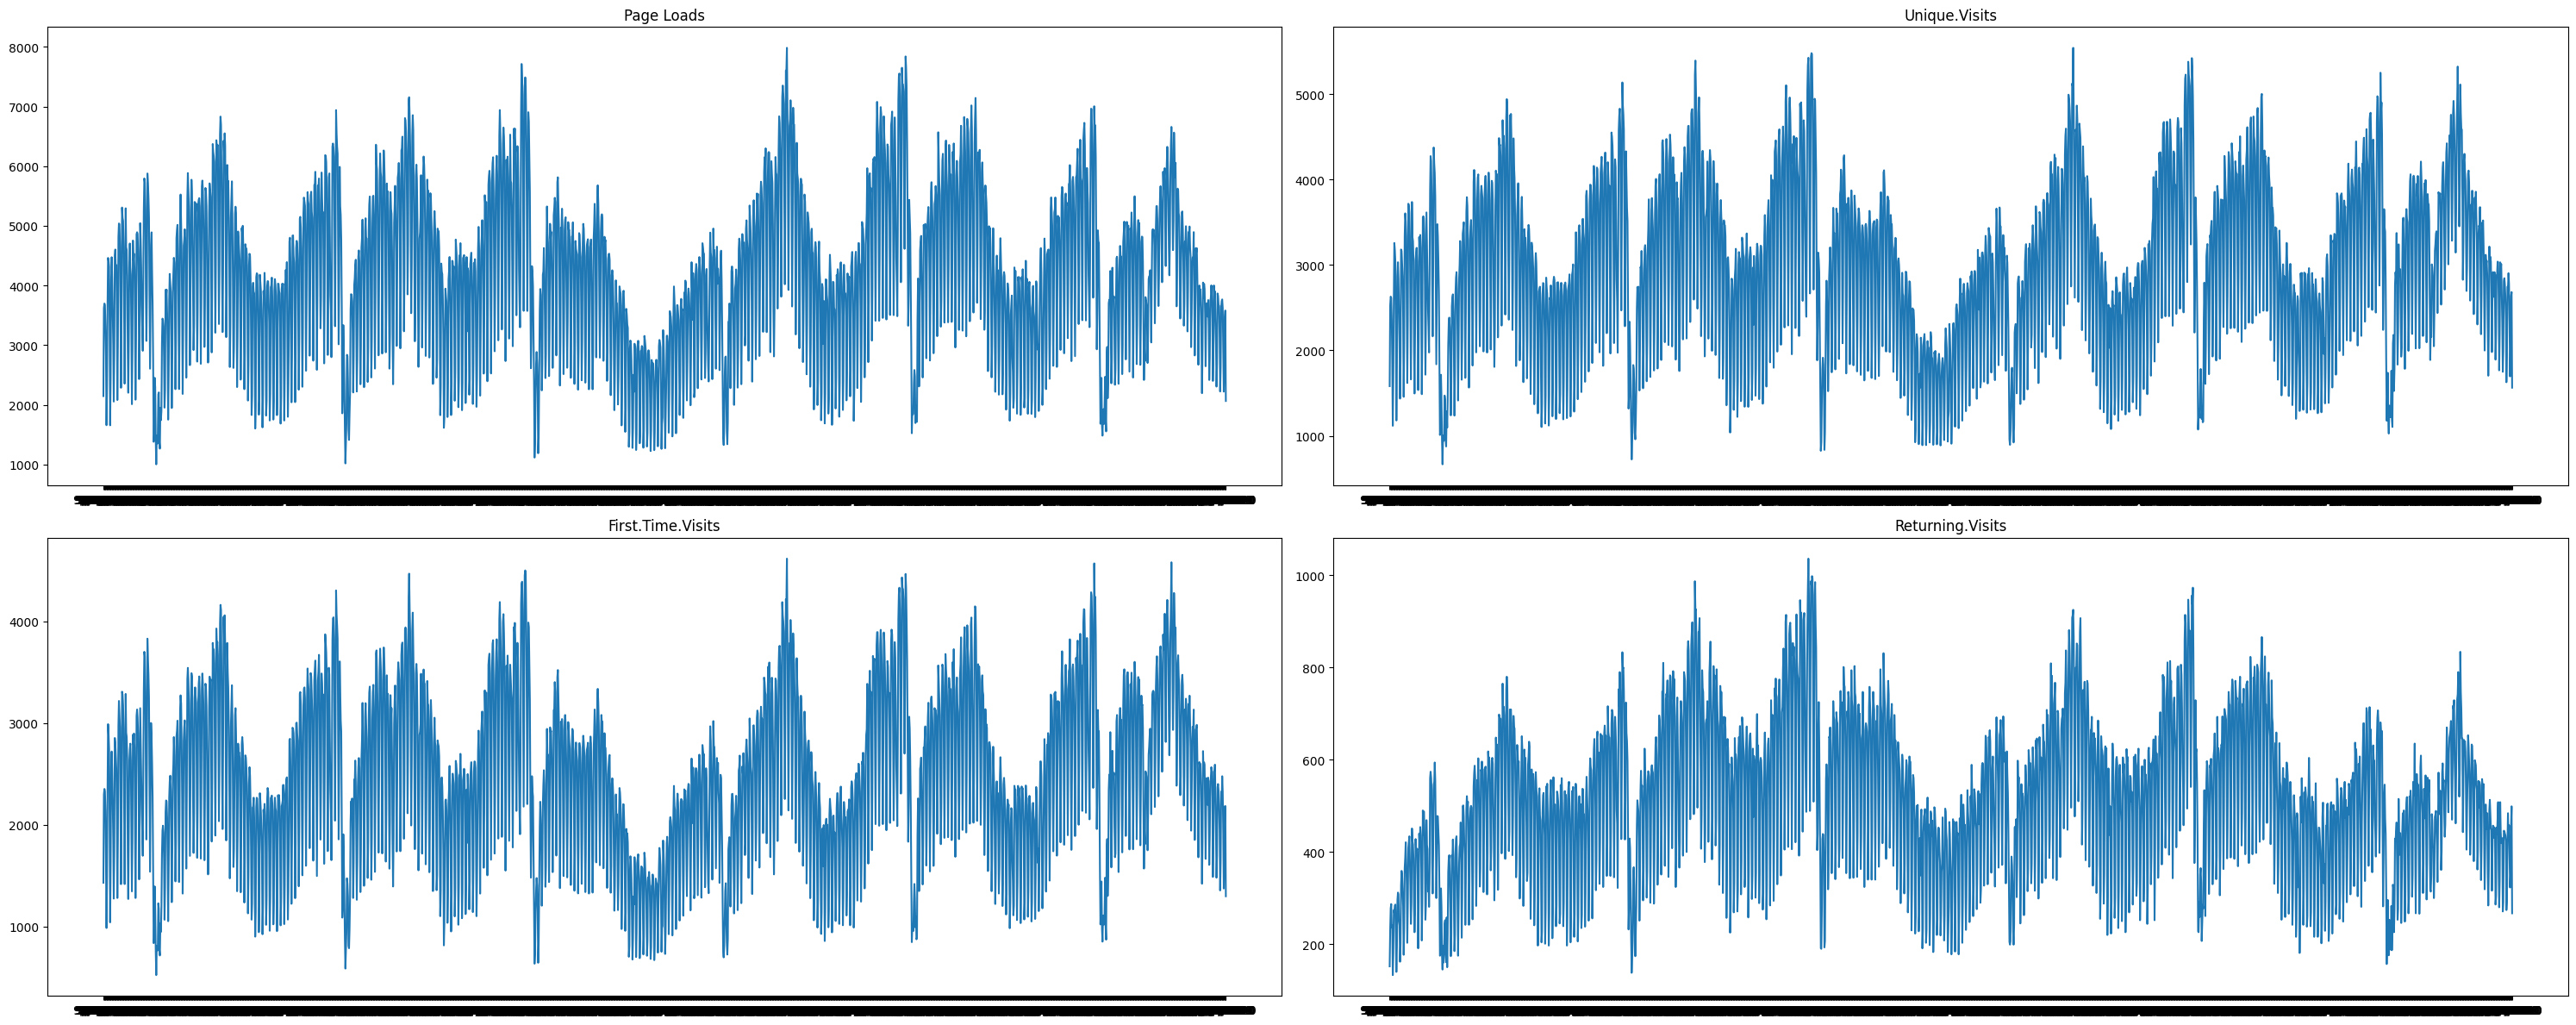

In [245]:
#line plot for all the years for Page Loads, Unique Visits, first time visits and 
# Returning Visits for more closer understanding by plotting the graphs individually

fig, axs = plt.subplots(2, 2, figsize=(30, 12))

axs[0, 0].plot(data_website['Date'], data_website['Page.Loads'])
axs[0, 0].set_title('Page Loads')

axs[0, 1].plot(data_website['Date'], data_website['Unique.Visits'])
axs[0, 1].set_title('Unique.Visits')

axs[1, 0].plot(data_website['Date'], data_website['First.Time.Visits'])
axs[1, 0].set_title('First.Time.Visits')

axs[1, 1].plot(data_website['Date'], data_website['Returning.Visits'])
axs[1, 1].set_title('Returning.Visits')

fig.tight_layout()

plt.show()


The line chart shows the progression of a all the 4 attributes- Page loads, unique visits, first time visits and returning visits measured over the course of 2014 to 2020, with dates on the horizontal axis and the count of the occurrances of variables on the vertical axis. The chart suggests that the variable demonstrates a distinct overall pattern, either increasing or decreasing over time. Additionally, there appears to be some level of seasonality present in the data, with regular patterns of fluctuations occurring at fixed intervals. This implies that the variable may be affected by recurring factors such as seasonal changes.




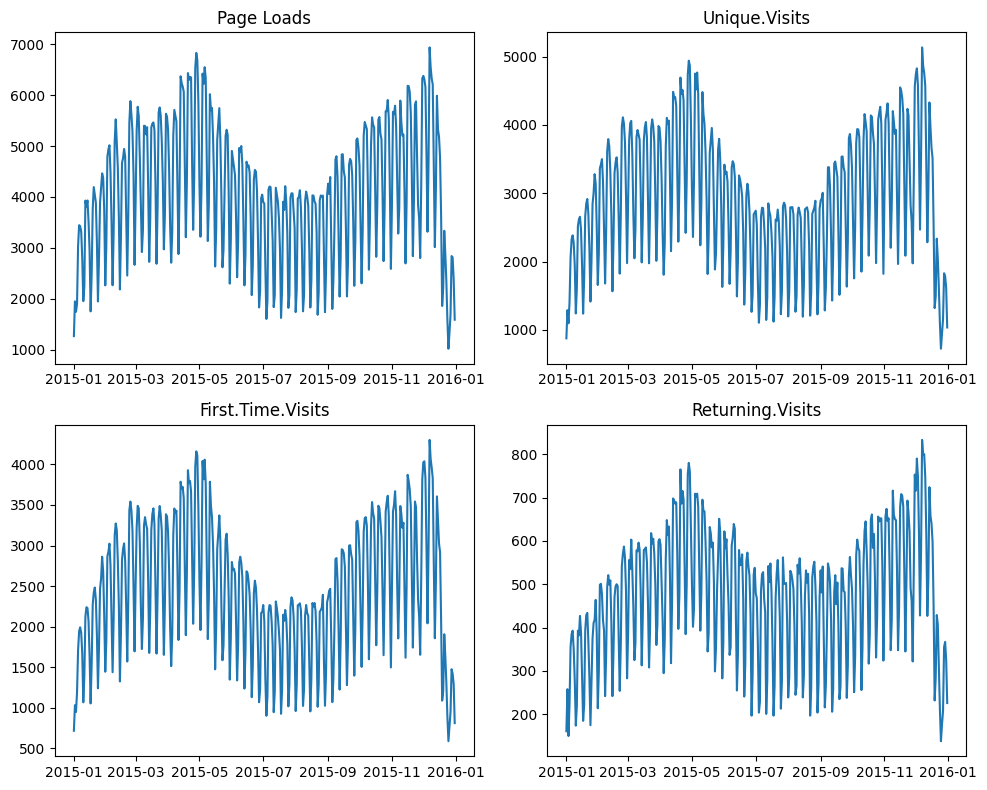

In [179]:
# understanding trends for one particular year-2015
data = data_website.loc['2015']
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(data['Page.Loads'])
axs[0, 0].set_title('Page Loads')

axs[0, 1].plot( data['Unique.Visits'])
axs[0, 1].set_title('Unique.Visits')

# plot the third graph in the bottom left subplot
axs[1, 0].plot(data['First.Time.Visits'])
axs[1, 0].set_title('First.Time.Visits')

# plot the fourth graph in the bottom right subplot
axs[1, 1].plot(data['Returning.Visits'])
axs[1, 1].set_title('Returning.Visits')

# adjust the spacing between the subplots
fig.tight_layout()

# show the plot
plt.show()

To get a clear understanding of the pattern in the data we take a more closer look by considering only one year's data. 

The plot above is taken for a subset of year 2015. Based on the plot, we can infer that the number of visits initially rises until May, then gradually declines which continues till September 2015, and eventually starts to increase again from September onwards.

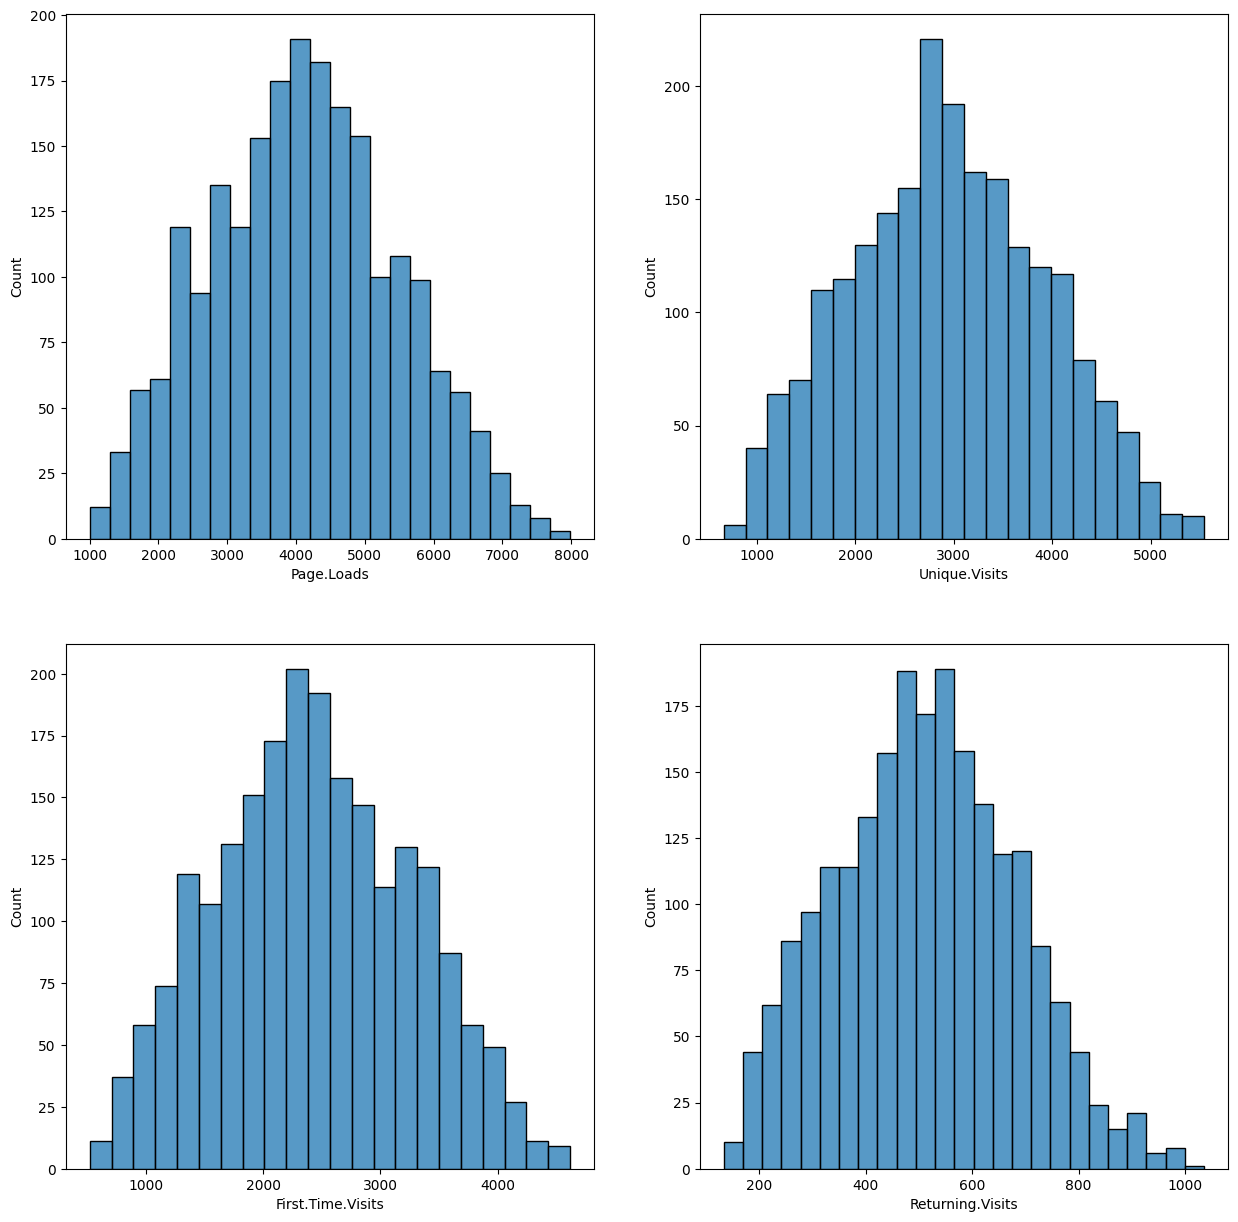

In [180]:
#histogram plots
cols_to_plot = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=data_website, x=col)

To understand the distribution of data and check for presence of skewness in the data we plot a Histogram as seen above. 

The observation from the above plot is that the data is normally distributed about the mean for all of the 4 attributes. 

In [181]:
#Day wise analysis
day_grouped_data = data_website.iloc[:,1:].groupby('Day')
avg_day_data = day_grouped_data.mean().reset_index()
avg_day_data

,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,Friday,6.0,3719.860841,2646.770227,2164.417476,482.352751
1,Monday,2.0,4845.680645,3458.425806,2858.180645,600.245161
2,Saturday,7.0,2501.025890,1786.747573,1477.181230,309.566343
3,Sunday,1.0,3246.980645,2341.270968,1949.025806,392.245161
4,Thursday,5.0,4651.355987,3327.553398,2747.317152,580.236246
5,Tuesday,3.0,4955.335484,3539.293548,2928.232258,611.061290
6,Wednesday,4.0,4893.916129,3502.012903,2895.490323,606.522581


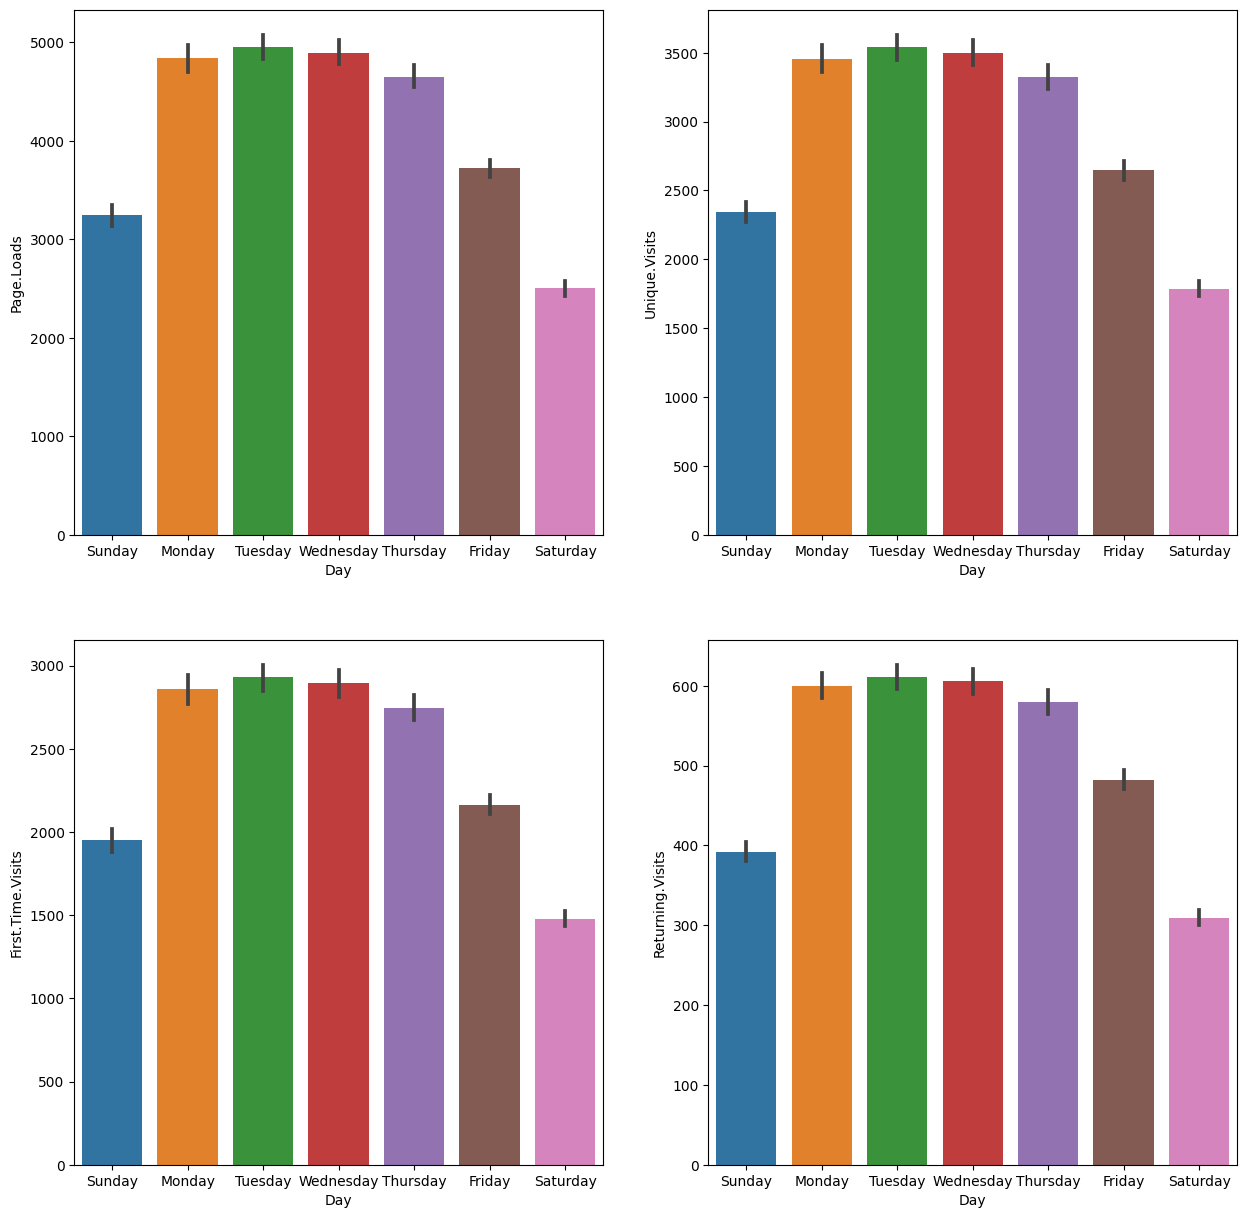

In [182]:
# Plot the Bargraph for every continuous variable across day
cols_to_plot = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=data_website, x='Day', y=col)

The objective of the above plot is to understand the daywise analysis for the variables of interest - Page.Loads, Unique.Visits, First.Time.Visits, Returning.Visits. 

The observations from the above plots for the 4 attributes are as follows:
1. Page.Loads - Higher number of page loads are observed on Monday, Tuesday and Wednesday whereas lowest number of page loads was observed on Saturday. 


2. Unique.Visits - Similar to the trend observed in Page.Loads we can observe that highest number of unique visits are observed on Monday, Tuesday and Wednesday whereas lowest number of unique visits was observed on Saturday. 


3. First.Time.Visits -  Similar to the trend observed in Page.Loads and Unique.Visits we can observe that highest number of First time visits are observed on Monday, Tuesday and Wednesday whereas lowest number of first time visits was observed on Saturday.


4. Returning.Visits - Again a similar trend is observed in the returning visits data.


Overall, we can conclude that highest trend is observed on Mondays, Tuesdays and Wednesdays whereas lowest trend is observed on Saturdays

##  Check for white noise

In order to determine whether the time series is White Noise we implement the following techniques:


1. Apply the kpss test -A KPSS test can be used to determine if a time series is trend stationary.This test uses the following null and alternative hypothesis:
H0: The time series is trend stationary.
HA: The time series is not trend stationary.
If the p-value of the test is less than some significance level (e.g. α = .05) then we reject the null hypothesis and conclude that the time series is not trend stationary.
Otherwise, we fail to reject the null hypothesis.

2. Apply the Ljung Box Test that gives the Ljung-Box statistic for testing if a time series is white noise, and the corresponding p-value. A p-value of less than 0.05 indicates a significant auto-correlation and proves that the time series is not white noise


3. Apply the Box-Pierce test and it’s test statistic is called the Q statistic. For the given time series, we can check if the value of Q deviates from zero in a statistically significant way looking up at the p-value of the test statistic in the Chi-square tables. Usually, a p-value of less than 0.05 indicates a significant auto-correlation and proves that the time series is not white noise


4. Auto-correlation plots: For white noise series, we expect each autocorrelation to be close to zero. Of course, they will not be exactly equal to zero as there is some random variation. For a white noise series, we expect 95% of the spikes in the ACF to lie within  ±2/√T where  T is the length of the time series. It is common to plot these bounds on a graph of the ACF (the blue shaded region above). If one or more large spikes are outside these bounds, or if substantially more than 5% of spikes are outside these bounds, then the series is probably not white noise.



## KPSS Test

In [248]:
sm.tsa.stattools.kpss(unique_visits, regression='c')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.24528128576326558,
 0.1,
 22,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The p-value is 0.1. Since this value is not less than .05, we fail to reject the null hypothesis of the KPSS test.

This means we can assume that the time series is  stationary.

### Testing using Ljung Box and Box Pierce Test

In [183]:
diag.acorr_ljungbox(data_website['Unique.Visits'], lags=[10], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
10,5810.661684,0.0,5790.981658,0.0


Test Statistic for Ljungbox = 5810.661684	

p-value for Ljungbox = 0

Test Statistic for Box-Pierce Test = 5790.981658

p-value for Box-Pierce = 0

Both the p-values from Chi-Square table are less than 0.01 , So with 99% confidence , we say that the time series is not Pure White noise

### Autocorrelation Plot

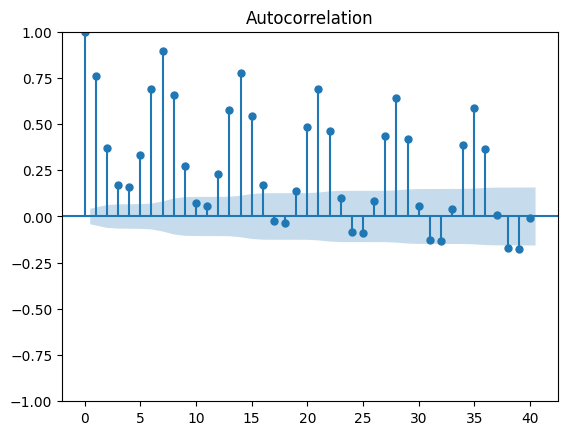

In [184]:
plot_acf(data_website['Unique.Visits'],lags=40) 
plt.show()

On looking at the Autocorrelation (ACF) plot above we can say that more than 5% of the spikes are significantly larger than 0 which proves that the time series is not white Noise. 

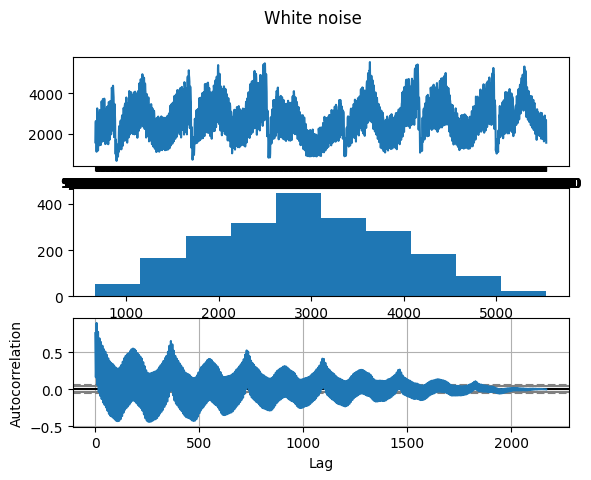

In [185]:
fig, ax = plt.subplots(3)
fig.suptitle('White noise')
# line plot
ax[0].plot(data_website['Date'], data_website['Unique.Visits']) # should be random
# histogram plot
ax[1].hist(data_website['Unique.Visits'], bins=10) # bell curve (distribution is Gaussiaan)
# autocorrelation
autocorrelation_plot(data_website['Unique.Visits'], ax=ax[2]) # Note a different syntax for ACF plot
plt.show()

Above we have an additional plot to check for any white noise. We can see the first plot indicates a random trend in the data followed by a histogram plot that has a bell-shaped curved showing a Gaussian distribution and lastly we have plotted an Autocorrelation plot using another method where we can observe dashed lines in grey indicating the bounds and a large amount of data spikes above the bounds indicating that time series is not white Noise

## ACF and PACF plots

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


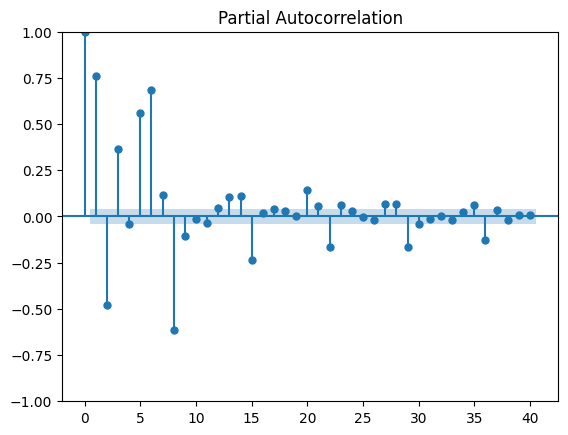

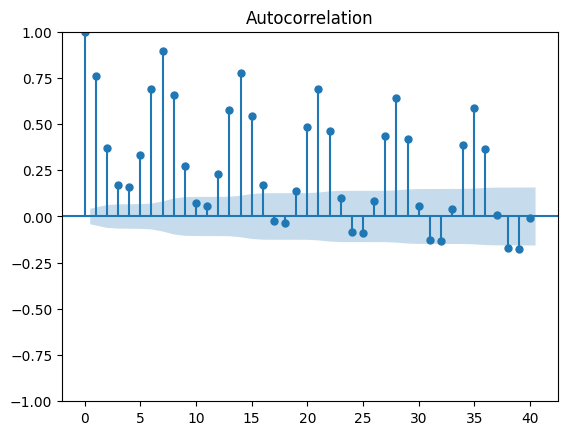

In [186]:
plot_pacf(data_website['Unique.Visits'],lags=40)
plot_acf(data_website['Unique.Visits'],lags=40) 
plt.show()

Above are the two plots - 
1. Partial Autocorrelation plot (PACF)
2. Autocorrelation plot (ACF)

The above plots give an indication of how correlated different time period values are. On the x-axis we can observed the lags for example 5 refers to 5 time periods back. In our case we have considered 40 time period lags. On the y-axis we can see the correlation, more specifically the Pearson's correlation that lies between [-1,1]. Higher the value, more the correlation.

On looking at the autocorrelation (ACF) plot which considers the direct and the indirect effect of the values of the previous time lags, We can make the following observations:
1. High degree of autocorrelation between adjacent (lag = 1) and near-adjacent (lag = 7) observations in ACF plot


A partial autocorrelation (PACF) plot mainly focuses on the the direct effect of the values of the previous time lags.
We can make the following observations:
1. There are several autocorrelations that are significantly non-zero. Therefore, the time series is non-random.
2. High degree of autocorrelation between adjacent (lag = 1) and near-adjacent (lag = 6) observations in PACF plot

## Time series decomposition

### Additive Decomposition

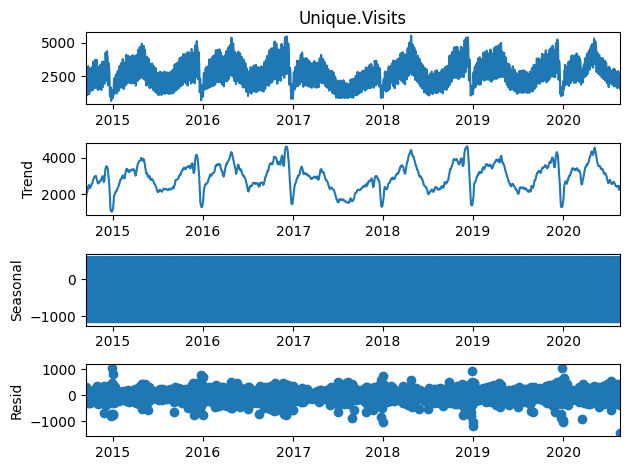

In [187]:
from statsmodels.tsa.seasonal import seasonal_decompose

unique_visits = data_website['Unique.Visits']

# define a function to perform additive decomposition
def decompose(column, model='additive'):
    decomp = seasonal_decompose(column, model=model, extrapolate_trend='freq')
    return decomp

# perform additive decomposition on 'Unique.Visits'
result_add = decompose(unique_visits, model='additive')

# plot the results
result_add.plot()
plt.show()

In [188]:
new_df_add = pd.concat([result_add.trend, result_add.seasonal, result_add.resid],
                       axis=1)
new_df_add.columns = ['Trend', 'Seasonality', 'Residual']

print(new_df_add.head())

                  Trend  Seasonality    Residual
Date                                            
2014-09-14  1864.785714  -599.532110  316.746395
2014-09-15  1926.586735   516.560484   84.852781
2014-09-16  1988.387755   597.016277   44.595968
2014-09-17  2100.142857   559.101251  -45.244108
2014-09-18  2110.714286   382.856436 -127.570722


In [189]:
result_add.observed[0]

1582.0

In [190]:
# additive decomposition  formula -> observed = trend+seasonal+residual
result_add.trend[0]+ result_add.seasonal[0]+ result_add.resid[0]

1582.0

The three primary components which are the trend, seasonality, and residual can be seen for above decomposition.We can see from the additive decomposition that there is a clear overall pattern in the data.There is some evidence of seasonality in the data, with regular patterns of fluctuations occurring at fixed intervals . Finally, the residual component shows that there is still some amount of unexplained variation in the data that is not captured by the trend and seasonality components.

### Multiplicative Decomposition

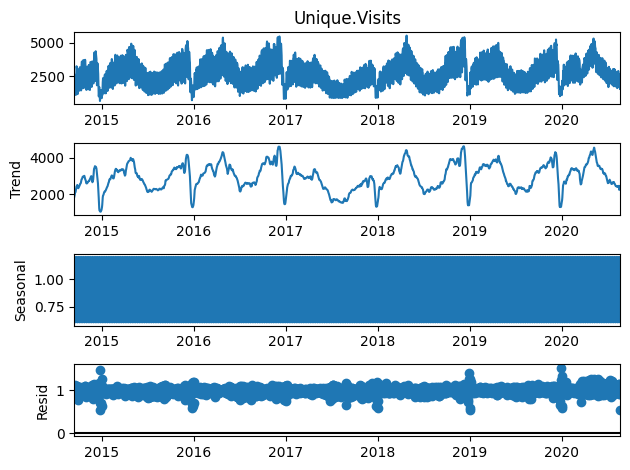

In [191]:
unique_visits = data_website['Unique.Visits']

# define a function to perform additive decomposition
def decompose(column, model='multiplicative'):
    decomp = seasonal_decompose(column, model=model, extrapolate_trend='freq')
    return decomp

# perform additive decomposition on 'Unique.Visits'
result_mul = decompose(unique_visits, model='multiplicative')

# plot the results
result_mul.plot()
plt.show()

In [192]:
result_mul.observed[0]

1582.0

In [193]:
# multiplicative decomposition  formula -> observed = trend*seasonal*residual
result_mul.trend[0]* result_mul.seasonal[0]* result_mul.resid[0]

1582.0000000000002

In [194]:
new_df_mul = pd.concat([result_mul.trend, result_mul.seasonal, result_mul.resid], 
                       axis=1)
new_df_mul.columns = ['Trend', 'Seasonality', 'Residual']

print(new_df_mul.head())

                  Trend  Seasonality  Residual
Date                                          
2014-09-14  1864.785714     0.788273  1.076220
2014-09-15  1926.586735     1.173979  1.117707
2014-09-16  1988.387755     1.205204  1.097473
2014-09-17  2100.142857     1.191120  1.044964
2014-09-18  2110.714286     1.132486  0.989811


In a multiplicative decomposition, the observed time series is modeled as the product of the three components: trend, seasonality, and residual.We can see that there is a clear overall pattern in the data. There is some evidence of seasonality in the data, with regular patterns of fluctuations occurring at fixed intervals. Finally, the residual component shows that there is still some amount of unexplained variation in the data that is not captured by the trend and seasonality components.

## Description of Time series 

### Is it stationary, are there any trends, seasonality ?

<Axes: xlabel='Date'>

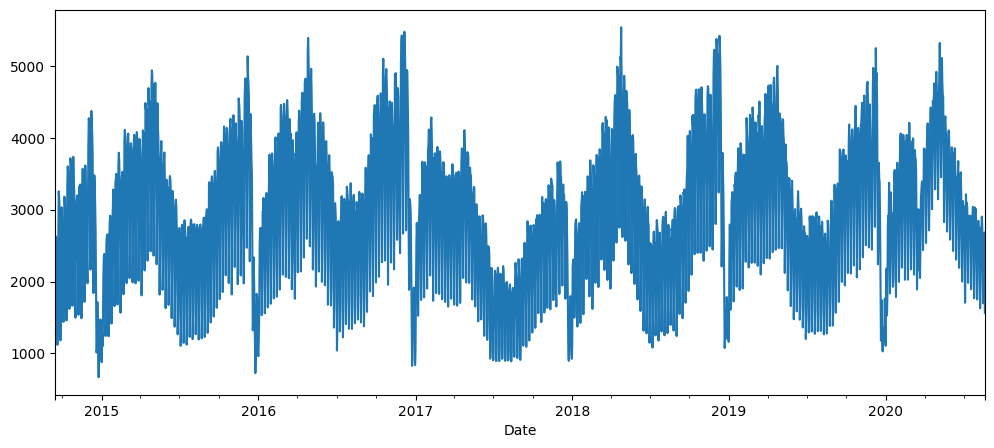

In [195]:
data_website['Unique.Visits'].plot(figsize=(12,5))

On looking at the plot above we can observe that there is **no trend** in the data but we can observe **seasonality** exists in the data. At the beginning of every year there is a spike in the unique number of visits followed by a dip which is again followed by a rise in the unique visits. Since this data belongs to the statistical forecasting teaching notes website the possible reasons for this seasonality can be because at the start of the academic year there a lot of students visiting the website and scrolling different pages to traverse through the notes followed by a decrease in the number of visits in the middle of the year as the pace of the academics get a little slow. However at the end of the year there is a sudden spike possible due to the exam season. 

In [196]:
# ADF Test - null hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(data_website['Unique.Visits'].values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.475968574445406
p-value: 0.00021726409300080015
Critial Values:
   1%, -3.4334094211542983
Critial Values:
   5%, -2.8628915360971003
Critial Values:
   10%, -2.5674894918770197


In order to determine whether our data is stationary or non-stationary we perform the following steps:
1. Visual Inspection - on observing the graph above we can observe that that data shows somewhat a constant mean of approximately 2900 but there is some seasonality present in the data. Hence, visual inspection is not sufficient to check for stationarity in the data.


2. To further verify we perform the ADF (Augmented Dickey-Fuller) test. The ADF test is a statistical test used to determine whether a time series is stationary or non-stationary. 


3. In the output you provided, the ADF statistic is -4.283821436187665, and the p-value is 0.0004737578257465072. The p-value is less than the significance level of 0.05, which indicates that the null hypothesis (the time series is non-stationary) can be rejected. The ADF statistic is also less than the critical values at the 1%, 5%, and 10% levels.


4. Therefore, we can conclude that the time series is  **Stationary**

## TS models

The models planned on being used for training:
1. ARIMA  (Autoregressive Integrated Moving Average Model)-ARIMA can capture both short-term and long-term patterns in the data, as well as any seasonal fluctuations that may be present.An ARIMA model could be trained on past website traffic data to predict how much traffic is likely to be seen in the future, and to identify any potential seasonal patterns that might impact the traffic.
2. AutoReg (Autoregression Model)-AR can capture the autoregressive nature of the data, which means that the current value of the time series is dependent on past values. In other words, the traffic levels on a website at any given time are often influenced by the traffic levels that occurred in the past.
3. LSTM (Long Short-Term Memory networks)-Website traffic datasets typically involve time series data, where the number of visitors, pageviews, and other metrics change over time. LSTM models are particularly effective at modeling time series data because they are able to capture long-term dependencies in the data, which is essential for accurately predicting future website traffic.



## ARIMA 

In [256]:
#identify the optimal set of parameters for the ARIMA model, based on the 
# Akaike information criterion (AIC)
stepwise_fit = auto_arima(unique_visits, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32845.925, Time=2.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=34399.149, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34191.021, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33716.504, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34397.150, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=33107.193, Time=1.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=32879.741, Time=1.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=32768.828, Time=4.66 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=33424.673, Time=1.56 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=30739.253, Time=5.87 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=31813.648, Time=4.69 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=30517.978, Time=9.64 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=31044.387, Time=3.25 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=30498.269, Time=12.34 sec
 ARIMA(4,1,3)(0,0,

We supply our data to the auto_arima function. The function uses the AIC score to judge how good a particular order model is. It  tries to minimize the AIC score. We can see the best ARIMA model seems to be of the order (5,1,5) with the minimum AIC score=29978.342. With this information we proceeded to train and fit the model to make prediction

In [258]:
train=unique_visits.iloc[:-150]
test=unique_visits.iloc[-150:]
print(train.shape,test.shape)
model=sm.tsa.arima.ARIMA(unique_visits,order=(5,1,5))
model=model.fit()
model.summary()

(2017,) (150,)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Unique.Visits   No. Observations:                 2167
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -14978.171
Date:                Wed, 05 Apr 2023   AIC                          29978.342
Time:                        01:29:42   BIC                          30040.829
Sample:                    09-14-2014   HQIC                         30001.193
                         - 08-19-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1316      0.167     -0.787      0.431      -0.459       0.196
ar.L2         -0.6950      0.134     -5.187      0.000      -0.958      -0.432
ar.L3         -0.5452      0.241     -2.261      0.024      -1.018      -0.073
ar.L4         -0.2496      0.134     -1.867      0.062      -0.512       0.012
ar.L5         -0.9285      0.167     -5.575      0.000      -1.255      -0.602
ma.L1          0.1533      0.162      0.945      0.345      -0.165       0.471
ma.L2          0.5432      0.125      4.332      0.000       0.297       0.789
ma.L3          0.4495      0.203      2.210      0.027       0.051       0.848
ma.L4          0.0736      0.120      0.612      0.540      -0.162       0.309
ma.L5          0.7371      0.124      5.953      0.000       0.494       0.980
sigma2      7.064e+04   2046.712     34.512      0.000    6.66e+04    7.46e+04
===================================================================================
Ljung-Box (L1) (Q):                  45.88   Jarque-Bera (JB):               253.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             0.00
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

we reserving the last 150 rows of the data as the testing section.  The shapes of the testing and training section can be observed in the above output.

## Predictions

<Axes: xlabel='Date'>

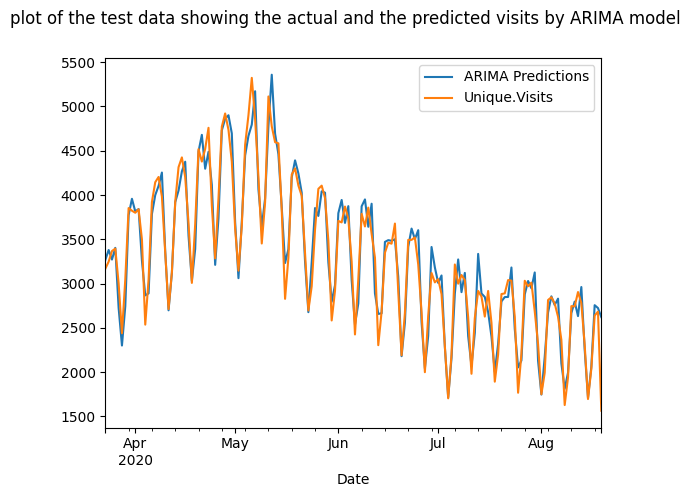

In [259]:
# plot of the test data showing the actual and the predicted visits by ARIMA model
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
plt.suptitle("plot of the test data showing the actual and the predicted visits by ARIMA model")
pred.plot(legend=True)
test.plot(legend=True)

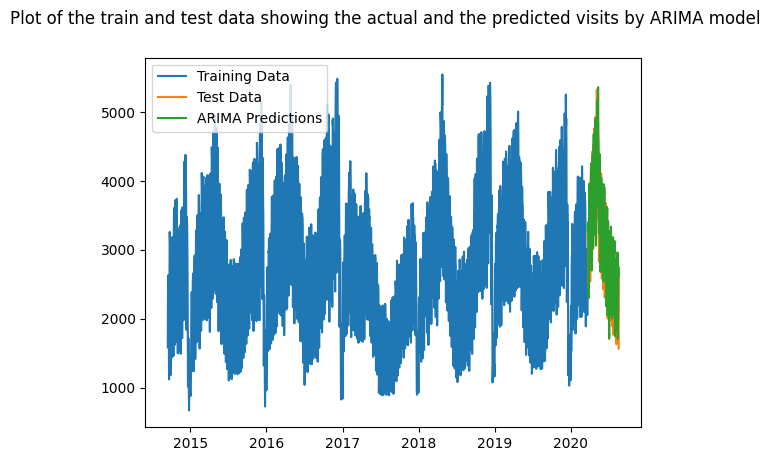

In [261]:
#overall plot
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred_df = pd.concat([train, test, pred], axis=1)
plt.suptitle("Plot of the train and test data showing the actual and the predicted visits by ARIMA model")
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(pred, label='ARIMA Predictions')
plt.legend(['Training Data', 'Test Data', 'ARIMA Predictions'])
plt.show()


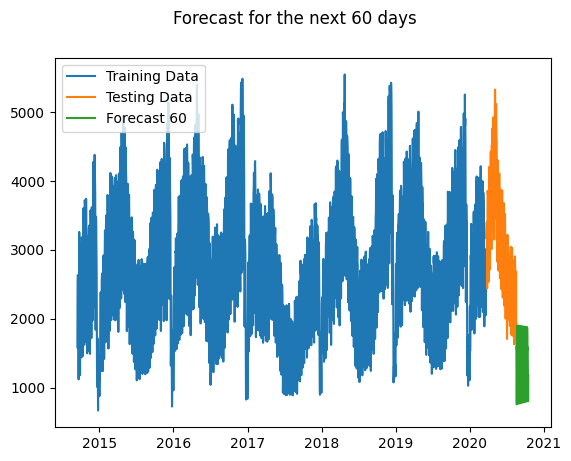

In [219]:
#  forecast for next 60 days
forecast = model.forecast(steps=60)
dates = pd.date_range(start=test.index[-1], periods=60)
forecast_ARIMA = pd.DataFrame({'Date': dates, 'Forecast': forecast})
forecast_ARIMA = forecast_ARIMA.set_index('Date')
plt.suptitle('Forecast for the next 60 days')
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(forecast_ARIMA, label='Forecast 60')
plt.legend()
plt.show()

As we can see the predictions do a pretty good job of matching with the actual trend all though there is a small acceptable lag.

In [222]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(pred, test))
print('RMSE value: %.3f' % rmse)

RMSE value: 14.494


## AR Model

In [263]:
train=unique_visits.iloc[:-150]
test=unique_visits.iloc[-150:]
print(train.shape,test.shape)
lag_values = range(0, 30)
best_lag = 0
lower_rmse = np.inf
for l in lag_values:
    # Fit AR model with current lag value
    model_ar = AutoReg(train, lags=l)
    model_ar_fit = model_ar.fit()
    # Make predictions on test set using fitted model
    predictions = model_ar_fit.predict(start=len(train), end=len(train) + len(test)-1,
                                       dynamic=False)
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print(f"Lags = {l}, RMSE = {rmse}")
    if rmse < lower_rmse:
        lower_rmse = rmse
        best_lag = l

# Print final best lag value
print(f"Best value of lag: {best_lag}")

(2017,) (150,)
Lags = 0, RMSE = 29.787746234547196
Lags = 1, RMSE = 29.84792009336335
Lags = 2, RMSE = 29.775958479205528
Lags = 3, RMSE = 29.777798403277103
Lags = 4, RMSE = 29.777470656956055
Lags = 5, RMSE = 29.82830010528805
Lags = 6, RMSE = 30.0664768670565
Lags = 7, RMSE = 30.35318636596742
Lags = 8, RMSE = 28.425317833292475
Lags = 9, RMSE = 28.243892220983565
Lags = 10, RMSE = 28.247549055258602
Lags = 11, RMSE = 28.27580704097373
Lags = 12, RMSE = 28.23992676058845

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the


Lags = 13, RMSE = 28.12813456279283
Lags = 14, RMSE = 27.78360414190984
Lags = 15, RMSE = 27.70977102794858
Lags = 16, RMSE = 27.714276942007842
Lags = 17, RMSE = 27.663458523116315
Lags = 18, RMSE = 27.578174252843024


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the

Lags = 19, RMSE = 27.55695191618559
Lags = 20, RMSE = 27.265649221126637
Lags = 21, RMSE = 27.215669644452465
Lags = 22, RMSE = 27.19870362640422
Lags = 23, RMSE = 27.181455071949603
Lags = 24, RMSE = 27.131044942199843
Lags = 25, RMSE = 27.14014598407972
Lags = 26, RMSE = 27.185859549912816
Lags = 27, RMSE = 27.00785426929352
Lags = 28, RMSE = 26.88052439248157
Lags = 29, RMSE = 27.03998176491223
Best value of lag: 28


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the

In [264]:
# Prediction using best AR model with the lag of 28
model_AR = AutoReg(train, lags=best_lag)
model_AR_fit = model_AR.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Predictions

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Axes: xlabel='Date'>

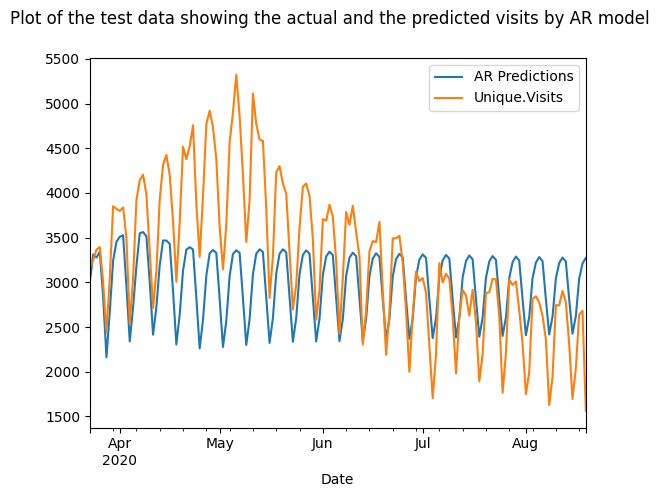

In [265]:
start=len(train)
end=len(train)+len(test)-1
pred=model_AR_fit.predict(start=start,end=len(train)+len(test)-1).rename('AR Predictions')
plt.suptitle("Plot of the test data showing the actual and the predicted visits by AR model")
pred.plot(legend=True)
test.plot(legend=True)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


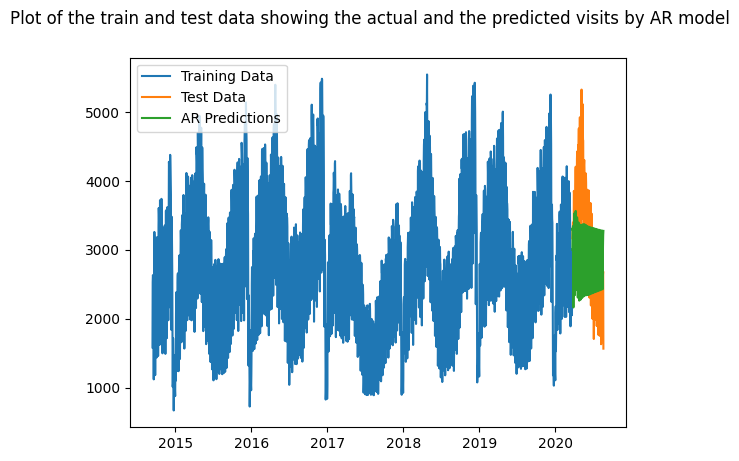

In [266]:
#overall plot
start=len(train)
end=len(train)+len(test)-1
pred=model_AR_fit.predict(start=start,end=end).rename('AR Predictions')
pred_df = pd.concat([train, test, pred], axis=1)
plt.suptitle("Plot of the train and test data showing the actual and the predicted visits by AR model")
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(pred, label='AR Predictions')
plt.legend(['Training Data', 'Test Data', 'AR Predictions'])
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


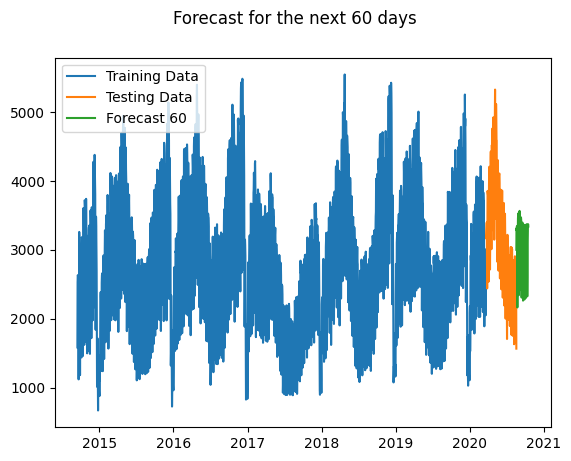

In [229]:
# forecast for next 60 days
forecast = model_AR_fit.forecast(steps=60)
dates = pd.date_range(start=test.index[-1], periods=60)
forecast_AR = pd.DataFrame({'Date': dates, 'Forecast': forecast})
forecast_AR = forecast_AR.set_index('Date')
plt.suptitle('Forecast for the next 60 days')
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(forecast_AR, label='Forecast 60')
plt.legend()
plt.show()

In [231]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(pred, test))
print('RMSE value: %.3f' % rmse)

RMSE value: 26.881


## LSTM method

In [267]:
dataset = unique_visits.values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train = dataset[:-150]
test = dataset[-150:]
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
 
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model_LSTM = Sequential()
model_LSTM.add(LSTM(4, input_shape=(1, look_back)))
model_LSTM.add(Dense(1))
model_LSTM.compile(loss='mean_squared_error', optimizer='adam')
model_LSTM.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
2015/2015 - 4s - loss: 0.0575 - 4s/epoch - 2ms/step
Epoch 2/100
2015/2015 - 3s - loss: 0.0235 - 3s/epoch - 1ms/step
Epoch 3/100
2015/2015 - 3s - loss: 0.0182 - 3s/epoch - 1ms/step
Epoch 4/100
2015/2015 - 3s - loss: 0.0178 - 3s/epoch - 2ms/step
Epoch 5/100
2015/2015 - 3s - loss: 0.0177 - 3s/epoch - 1ms/step
Epoch 6/100
2015/2015 - 5s - loss: 0.0178 - 5s/epoch - 2ms/step
Epoch 7/100
2015/2015 - 7s - loss: 0.0177 - 7s/epoch - 4ms/step
Epoch 8/100
2015/2015 - 4s - loss: 0.0176 - 4s/epoch - 2ms/step
Epoch 9/100
2015/2015 - 4s - loss: 0.0177 - 4s/epoch - 2ms/step
Epoch 10/100
2015/2015 - 3s - loss: 0.0177 - 3s/epoch - 1ms/step
Epoch 11/100
2015/2015 - 3s - loss: 0.0178 - 3s/epoch - 1ms/step
Epoch 12/100
2015/2015 - 3s - loss: 0.0177 - 3s/epoch - 1ms/step
Epoch 13/100
2015/2015 - 3s - loss: 0.0177 - 3s/epoch - 1ms/step
Epoch 14/100
2015/2015 - 3s - loss: 0.0177 - 3s/epoch - 1ms/step
Epoch 15/100
2015/2015 - 3s - loss: 0.0177 - 3s/epoch - 1ms/step
Epoch 16/100
2015/2015 - 2s - loss

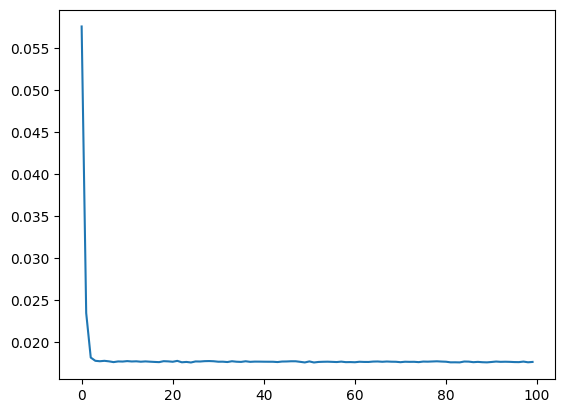

In [269]:
loss_per_epoch = model_LSTM.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

5/5 [==============================] - 0s 4ms/step


Text(0.5, 0.98, 'Plot of the test data showing the actual and the predicted visits by LSTM model')

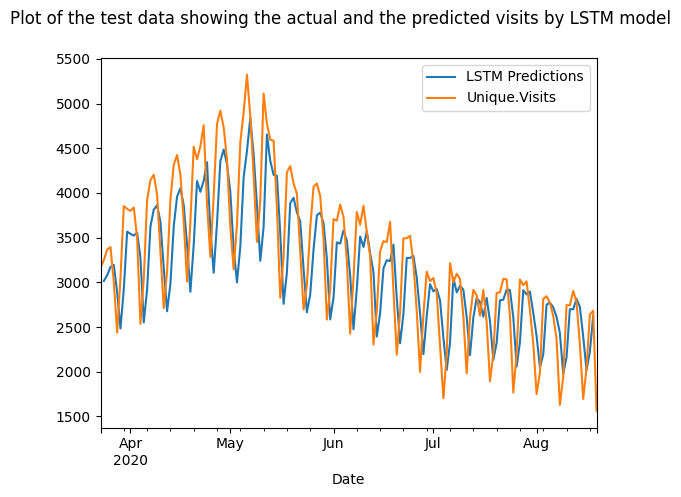

In [271]:
trainPredict = model_LSTM.predict(trainX)
testPredict = model_LSTM.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
test1 = unique_visits[-150:]
predict = pd.DataFrame(testPredictPlot, index=unique_visits.index).dropna()
predict.plot(label='LSTM Predictions', legend=True)
test1.plot(label='Unique.Visits', legend=True)
plt.legend(['LSTM Predictions', 'Unique.Visits'])
plt.suptitle("Plot of the test data showing the actual and the predicted visits by LSTM model")


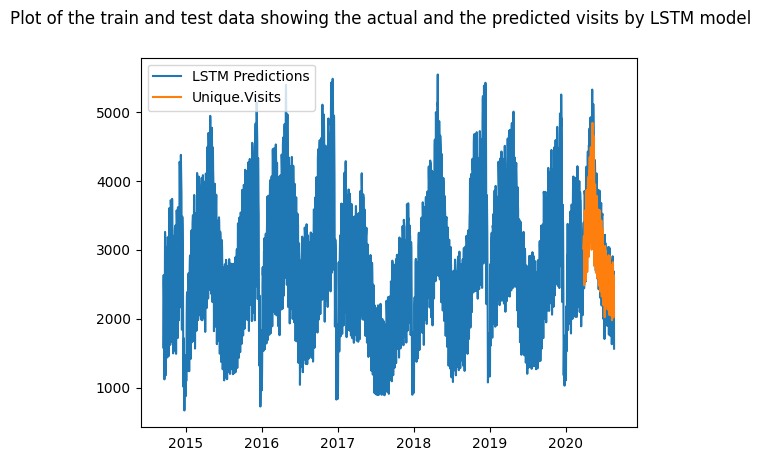

In [272]:
#overall plot
predict = pd.DataFrame(testPredictPlot, index=unique_visits.index).dropna()
plt.suptitle("Plot of the train and test data showing the actual and the predicted visits by LSTM model")
plt.plot(unique_visits)
plt.plot(predict)
plt.legend(['LSTM Predictions', 'Unique.Visits'])

In [253]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(testPredict, testX))
print(' RMSE value: %.3f' % rmse)

 RMSE value: 20.3


## Which Model is the best?

After training the data on 3 models i.e. ARIMA , AutoReg and LSTM and comparing their evaluation metrics which is the RMSE score we can observe that the ARIMA Model has the lowest error value of all the 3 models. 

Hence,we can conclude that for our Dataset **ARIMA model** is a good fit to forecast the future number of unique visits on the statistical notes teaching website

| | Model | RMSE Score    |
|---:|:-------------|:-----------|
| 1 | ARIMA | 14.494  | 
| 2 | AR  |  26.881   |
| 3 | LSTM  | 20.3     |

## Team contributions

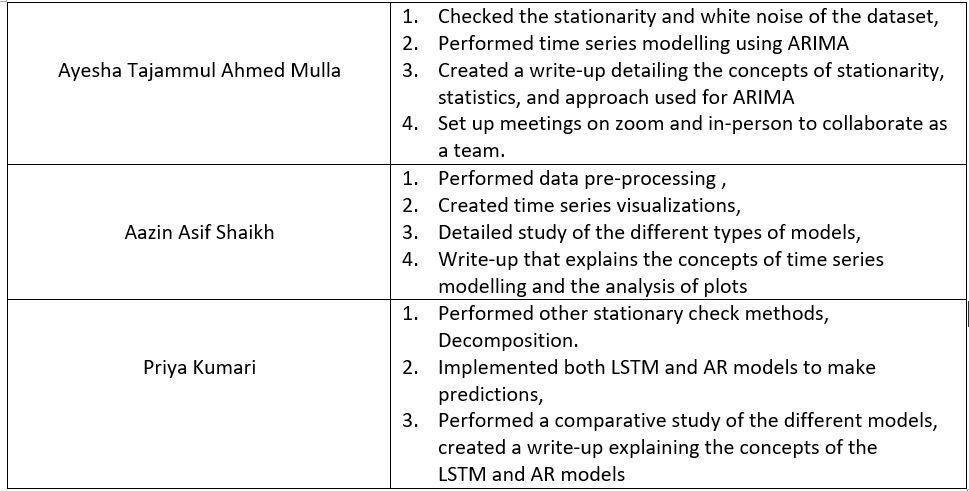

## References

https://www.youtube.com/watch?v=S8tpSG6Q2H0&list=PLqYFiz7NM_SMC4ZgXplbreXlRY4Jf4zBP&index=11&ab_channel=NachiketaHebbar

https://medium.com/swlh/temperature-forecasting-with-arima-model-in-python-427b2d3bcb53